In [9]:
# importing the libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [10]:
# Download NLTK resources (if not done before)
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
# Reading and loading the data 

df=pd.read_csv(r"D:\AI\Electropi\4.Natural Language Processing Foundation\5.capstone\capstone code\data\train.csv")
df.head(11)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [12]:
# data type info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


## Preprocessing the dataset

In [13]:
# pattern=r"@(w\+)"

def remove_pattern(pattern,input_text):
    
    r=re.findall(pattern,input_text)
    for word in r:
        input_text=re.sub(word,"",input_text)
    return input_text

In [14]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)( "@[\w]*",df['text'])

In [15]:
df.tail()

,id,keyword,location,text,target,clean_tweet
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,The out of control wild fires in California ...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,Police investigating after an e-bike collided ...
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1,The Latest: More Homes Razed by Northern Calif...


In [16]:
def clean_tweet(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters, numbers, and punctuation
    text = re.sub("[^a-zA-Z#@\s]", " ", text)
    return text

# Apply the clean_tweet function to each element in the 'tweet' column
df['clean_tweet'] = df['clean_tweet'].apply(clean_tweet)

# Display the cleaned DataFrame
print("DataFrame after cleaning:")
df.tail(20)





# def clean_tweet(text):
#     # Remove URLs
#     text = re.sub(r'http\S+', '', text)
#     # Remove HTML tags
#     text = re.sub(r'<.*?>', '', text)
#     # Remove special characters, numbers, punctuation, and usernames
#     text = re.sub(r"[^a-zA-Z#@\s]", "", text)
#     return text

# # Apply the clean_tweet function to each element in the 'tweet' column
# df['clean_tweet'] = df['tweet'].apply(clean_tweet)

# # Display the cleaned DataFrame
# print("DataFrame after cleaning:")
# print(df.tail(20))


DataFrame after cleaning:


,id,keyword,location,text,target,clean_tweet
7593,10848,NaN,NaN,I just heard a really loud bang and everyone i...,0,I just heard a really loud bang and everyone i...
7594,10849,NaN,NaN,A gas thing just exploded and I heard screams ...,1,A gas thing just exploded and I heard screams ...
7595,10850,NaN,NaN,NWS: Flash Flood Warning Continued for Shelby ...,1,NWS Flash Flood Warning Continued for Shelby ...
7596,10851,NaN,NaN,RT @LivingSafely: #NWS issues Severe #Thunders...,1,RT #NWS issues Severe #Thunderstorm Warnings...
7597,10852,NaN,NaN,#??? #?? #??? #??? MH370: Aircraft debris foun...,1,# # # # MH Aircraft debris foun...
7598,10853,NaN,NaN,Father-of-three Lost Control of Car After Over...,1,Father of three Lost Control of Car After Over...
7599,10854,NaN,NaN,1.3 #Earthquake in 9Km Ssw Of Anza California ...,1,#Earthquake in Km Ssw Of Anza California ...
7600,10855,NaN,NaN,Evacuation order lifted for town of Roosevelt:...,1,Evacuation order lifted for town of Roosevelt
7601,10859,NaN,NaN,#breaking #LA Refugio oil spill may have been ...,1,#breaking #LA Refugio oil spill may have been ...
7602,10860,NaN,NaN,a siren just went off and it wasn't the Forney...,1,a siren just went off and it wasn t the Forney...


In [17]:

# Download NLTK resources (if not done before)
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def normalize_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    
    # Apply stemming
    words = [stemmer.stem(word) for word in words]
    
    # Join the words back into a sentence
    normalized_text = ' '.join(words)
    
    return normalized_text

# Apply the normalize_text function to each element in the 'clean_tweet' column
df['normalized_tweet'] = df['clean_tweet'].apply(normalize_text)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id,keyword,location,text,target,clean_tweet,normalized_tweet
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,deed reason # earthquak may allah forgiv us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,forest fire near la rong sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are ...,resid ask shelter place notifi offic evacu she...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive #wildfires evacuation or...,peopl receiv # wildfir evacu order california
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,got sent photo rubi # alaska smoke # wildfir p...


In [18]:
# length of normaized tweets
df['tweet_length'] = df['normalized_tweet'].apply(len)
df.head()

,id,keyword,location,text,target,clean_tweet,normalized_tweet,tweet_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,deed reason # earthquak may allah forgiv us,43
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,forest fire near la rong sask canada,36
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are ...,resid ask shelter place notifi offic evacu she...,69
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive #wildfires evacuation or...,peopl receiv # wildfir evacu order california,45
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,got sent photo rubi # alaska smoke # wildfir p...,56


# split the data

In [19]:
x=df["normalized_tweet"]
y=df["target"]

### Visualizing the value count of terget column

<Axes: xlabel='target', ylabel='count'>

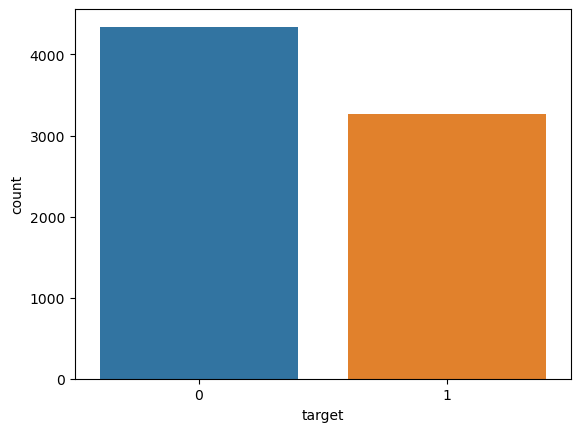

In [20]:
sns.countplot(df,x='target')

## Importing libararies of the models and vectorizers


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

## Choosing method between (CountVectorizer or TfidfVectorizer)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

choose = input("Enter 1 to choose Count vectorizer, 2 for TfidfVectorizer ")

if choose == '1':
    vectorizer_count = CountVectorizer()
    vectorizer_matrix = vectorizer_count.fit_transform(x)
    result_array = vectorizer_matrix.toarray()
    
elif choose == '2':
    # Assuming 'x' is a list of text documents

    # Create the TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer()

    # Fit and transform the documents
    tfidf_matrix = tfidf_vectorizer.fit_transform(x)

    # Convert the TF-IDF matrix to an array
    result_array = tfidf_matrix.toarray()
else:
    result_array = None  # Handle the case when choose is neither 1 nor 2

# Split the data into training and testing sets
X_count_train, X_count_test, y_train, y_test = train_test_split(result_array, y, test_size=0.2, random_state=42)


Enter 1 to choose Count vectorizer, 2 for TfidfVectorizer 1


In [23]:


rfc = RandomForestClassifier()
rfc.fit(X_count_train,y_train)

RandomForestClassifier()

In [24]:


# Make predictions
preds = rfc.predict(X_count_train)

# Print the classification report
print(classification_report(y_train, preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3468
           1       0.99      0.98      0.98      2622

    accuracy                           0.99      6090
   macro avg       0.99      0.99      0.99      6090
weighted avg       0.99      0.99      0.99      6090



###  The result of the previous types of Vectorizations is that there is slight better difference of the result to tfidf_vectorizer than CountVectorizer , so we can continue with either of them but it is recommended from me  to choose tfidf_vectorizer

### we know chose the best vectorizer , so it is the turn now on the model to see which is the best

In [251]:
knn = KNeighborsClassifier()
knn.fit(X_count_train,y_train)

KNeighborsClassifier()

In [252]:
prds = knn.predict(X_count_train)
print(classification_report(y_train,preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3468
           1       0.99      0.98      0.98      2622

    accuracy                           0.99      6090
   macro avg       0.99      0.99      0.99      6090
weighted avg       0.99      0.99      0.99      6090



In [26]:
from sklearn.naive_bayes import MultinomialNB

mnnb = MultinomialNB()
mnnb.fit(X_count_train, y_train)

MultinomialNB()

In [27]:
preds = mnnb.predict(X_count_train)
print(classification_report(y_train, preds))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3468
           1       0.91      0.84      0.87      2622

    accuracy                           0.90      6090
   macro avg       0.90      0.89      0.89      6090
weighted avg       0.90      0.90      0.90      6090



from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_count_train, y_train)

### So we conclude that the best two model and the same in the result is KNeighborsClassifier and RandomForestClassifier.

### We are going for predicitons for testing data .

In [29]:
# Reading and loading the data 

test_data=pd.read_csv(r"D:\AI\Electropi\4.Natural Language Processing Foundation\5.capstone\capstone code\data\test.csv")
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [257]:
# data type info
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [31]:
test_data["tweets"]=test_data["text"].apply(clean_tweet)

In [33]:
test_data.head()

,id,keyword,location,text,tweets
0,0,NaN,NaN,Just happened a terrible car crash,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",Heard about #earthquake is different cities s...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,Apocalypse lighting #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,Typhoon Soudelor kills in China and Taiwan


## splitting the test data

In [53]:
test_X=test_data["tweets"]

##  Make prediction on test data

In [58]:
# Assuming 'choose' is the variable indicating the vectorizer type (1 for CountVectorizer, 2 for TfidfVectorizer)
# Assuming 'result_array' is the variable containing the transformed training data
# Assuming 'rfc' is the trained RandomForestClassifier

# Applying the chosen vectorizer to the test data
if choose == '1':
    vectorized_test_X = vectorizer_count.transform(test_X)
elif choose == '2':
    vectorized_test_X = tfidf_vectorizer.transform(test_X)
else:
    vectorized_test_X = None

# Ensure the vectorized_test_X is not None before proceeding
if vectorized_test_X is not None:
    # Make predictions on the test data
    preds_test = rfc.predict(vectorized_test_X)

    # Display some sample predictions
    print("Sample Predictions for Test Data:")
    # Use the same number of rows as the length of predictions
    sample_predictions = pd.DataFrame({'id': test_data['id'], 'Predicted_Label': preds_test})
    print(sample_predictions)

    # Optionally, save the predictions to a CSV file
    sample_predictions.to_csv('test_predictions.csv', index=False)
else:
    print("Vectorized test data is None. Please choose a valid option for vectorization.")


Sample Predictions for Test Data:
         id  Predicted_Label
0         0                1
1         2                0
2         3                1
3         9                1
4        11                1
...     ...              ...
3258  10861                1
3259  10865                0
3260  10868                1
3261  10874                1
3262  10875                1

[3263 rows x 2 columns]
